In [1]:
!pip install -U scikit-learn
!pip install -U torch

In [2]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.svm import SVR
import pickle

sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

In [3]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')


import copy

train = utils.subsample(train, 2)
test = utils.subsample(test, 2)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

test = copy.deepcopy(test_scaled)

x_train, y_train = ut2.create_sequences(train_scaled[:], 1000, 1)
x_test, y_test = ut2.create_sequences(test_scaled, 1000, 1)


0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Len

In [4]:
filename = 'SVR_model.sav'
model = pickle.load(open(filename, 'rb'))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVR from version 1.0.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## **predicciones a 50 steps**

In [9]:
steps = 50
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [6]:
test50 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test50_SVR.csv", test50, delimiter=",")

  0%|          | 0/43951 [00:00<?, ?it/s]

100%|██████████| 43951/43951 [08:02<00:00, 91.18it/s]


In [12]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.011684495782898867
Mean Absolute Percentage Error: 1.5425616107826179
R2 Score: -0.9743183288041816
Root Mean Squared Error: 0.10109457982895906


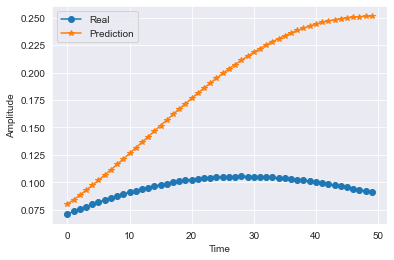

In [13]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **predicciones a 100 steps**

In [14]:
steps = 100
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [15]:
test100 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test100_SVR.csv", test100, delimiter=",")

100%|██████████| 43901/43901 [16:13<00:00, 45.09it/s]


In [16]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.02119175849972009
Mean Absolute Percentage Error: 2.1637539414804197
R2 Score: -2.577658046666878
Root Mean Squared Error: 0.13803880000224367


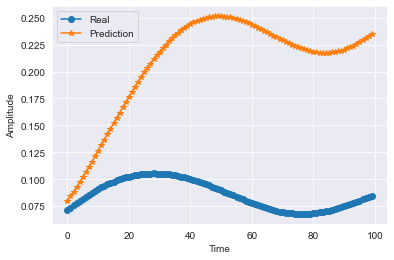

In [17]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Predicciones a 500 steps**

In [18]:
steps = 500
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()

In [19]:
test500 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test500_SVR.csv", test500, delimiter=",")

100%|██████████| 43501/43501 [1:18:56<00:00,  9.19it/s]


In [21]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.04809984679279519
Mean Absolute Percentage Error: 3.4308073858855903
R2 Score: -7.079926691048904
Root Mean Squared Error: 0.21263413168540474


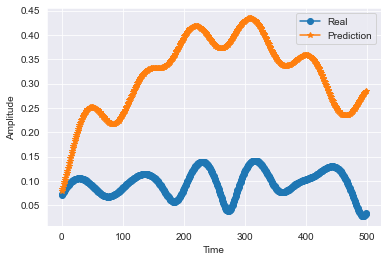

In [22]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **Predicciones a 1000 steps**

In [23]:
steps = 1000
x_test , y_test = ut2.create_sequences(test, 1000, steps)
y_test = y_test.squeeze()
test1000 = ut2.rollingWindowPrediction_SVR(model, x_test, steps)
np.savetxt("test1000_SVR.csv", test1000, delimiter=",")

100%|██████████| 43001/43001 [2:32:03<00:00,  4.71it/s]  


In [24]:
mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.037555484445934
Mean Absolute Percentage Error: 3.0677520831769054
R2 Score: -5.284692031386046
Root Mean Squared Error: 0.18662312214437599


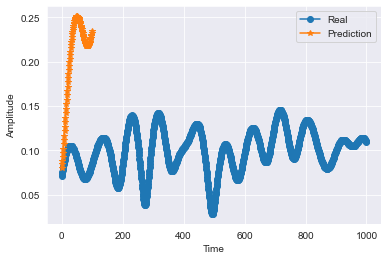

In [25]:
i = 1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()